In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
import pickle

In [7]:
#with open('../data/processed/train_set.pickle', 'rb') as f:
 #   cleaned_train_set = pickle.load(f)

cleaned_train_set = pd.read_csv("../data/raw/forestfires.csv")

In [8]:
cleaned_train_set.shape

(517, 13)

In [9]:
cleaned_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
cleaned_train_set.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
cleaned_train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Categorical columns

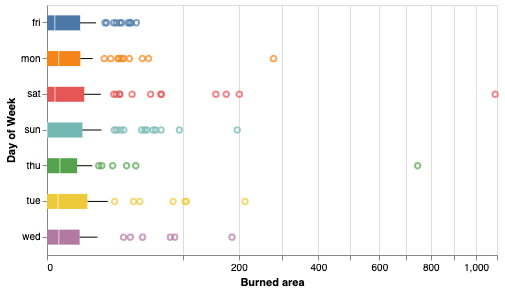

In [12]:
alt.Chart(cleaned_train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Burned area"),
    y = alt.Y("day", 
              sort = "x",
              title = "Day of Week"),
    color = alt.Color("day",
                      legend = None)
).properties(
    height = 250,
    width = 450
)

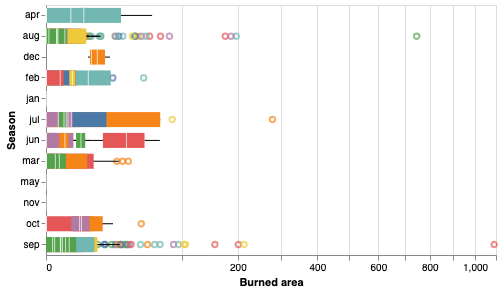

In [13]:
# Change month to season

alt.Chart(cleaned_train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Burned area"),
    y = alt.Y("month", 
              sort = "x",
              title = "Season"),
    color = alt.Color("day",
                      legend = None)
).properties(
    height = 250,
    width = 450
)

### Numerical columns

In [20]:
categorical_cols = ['X', 'Y']
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']

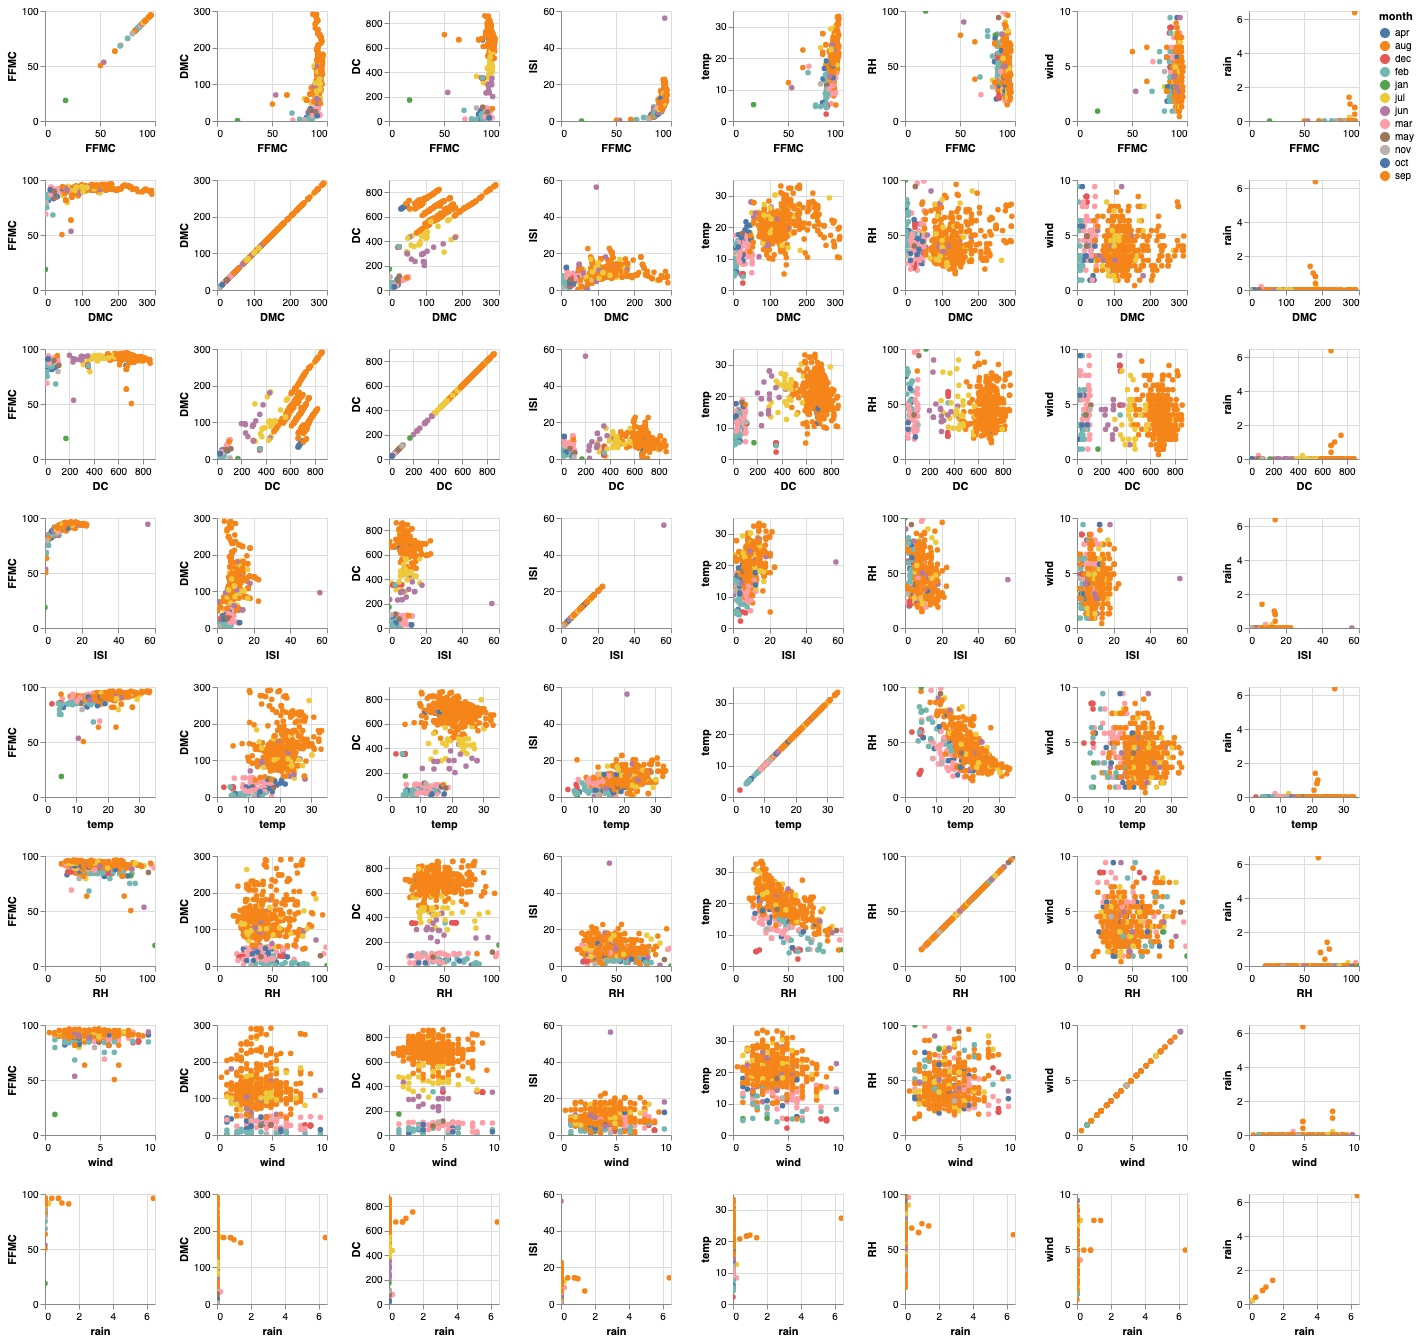

In [21]:
alt.Chart(cleaned_train_set).mark_circle().encode(
    x = alt.X(alt.repeat("row"), type = "quantitative"),
    y = alt.Y(alt.repeat("column"), type = "quantitative"),
    color = "month"
).properties(
    width = 110,
    height = 110
).repeat(
    column = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"],
    row = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]
).configure_mark(
    opacity = 1
).interactive()

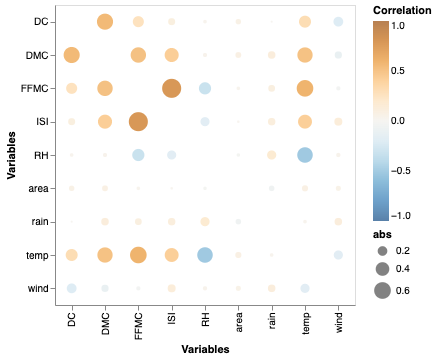

In [22]:
train_df_numeric = cleaned_train_set.drop(["X", "Y", "month", "day"], axis=1)

corr_df = train_df_numeric.corr("spearman").stack().reset_index(name="corr")
corr_df.loc[corr_df["corr"] == 1, "corr"] = 0
corr_df["abs"] = corr_df["corr"].abs()

(
    alt.Chart(corr_df)
    .mark_circle()
    .encode(x = alt.X("level_0", title = "Variables"),
            y = alt.Y("level_1", title = "Variables"),
            size = "abs",
            color = alt.Color('corr',
                               scale = alt.Scale(scheme = 'blueorange',
                                                 domain = (-1, 1)),
                               title = "Correlation"))
).properties(
    width = 300,
    height = 300
)